In [1]:
# =========================================================
# 0. Kütüphane Yükleme ve Etik Başlangıç
# =========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Eğer Colab kullanıyorsanız bu satırı ekleyin:
# from google.colab import files
from IPython.display import display

# --- Etik Not: Analiz başlamadan önce, projenin etik kapsamını,
# --- veri gizliliği kurallarını ve paydaş beklentilerini (ASA A, C, D)
# --- onaylayın.
print("✅ Etik Kapsam ve Yetkinlik Onaylandı.")


✅ Etik Kapsam ve Yetkinlik Onaylandı.


In [2]:
# =========================================================
# 1. Veri Yükleme ve İlk Bakış Modülü (COLAB Versiyonu)
# =========================================================

import pandas as pd
from google.colab import files
from IPython.display import display

def load_data_colab_manual():
    """
    Colab ortamında kullanıcıdan manuel olarak dosya yüklemesini ister
    ve yüklenen CSV dosyasını DataFrame olarak döndürür.
    """
    print("📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.")

    # 1. Yükleme işlemi
    try:
        uploaded = files.upload()
    except Exception as e:
        print(f"❌ HATA: Dosya yükleme arayüzü başlatılamadı: {e}")
        return None

    if not uploaded:
        print("⚠️ Hata: Hiçbir dosya yüklenmedi.")
        return None

    # 2. Yüklenen dosyayı okuma
    file_name = list(uploaded.keys())[0]

    try:
        df = pd.read_csv(file_name)
        print(f"\n✅ '{file_name}' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.")
        print(f"📊 Veri boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

        # Etik Kontrol: Veri Kaynağı Şeffaflığı
        print("⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).")

        return df

    except Exception as e:
        print(f"❌ HATA: '{file_name}' dosyası okunurken bir sorun oluştu. CSV formatında olduğundan emin olun. Hata: {e}")
        return None

# --- Örnek Çalıştırma ---
wdicountry_df = load_data_colab_manual()

# Yükleme başarılıysa, DataFrame'in ilk birkaç satırını kontrol edelim.
if wdicountry_df is not None:
    print("\n🔹 Yüklenen Veri Seti İlk 5 Satır:")
    display(wdicountry_df.head())

📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.


Saving WDIfootnote.csv to WDIfootnote.csv

✅ 'WDIfootnote.csv' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.
📊 Veri boyutu: 863158 satır, 4 sütun
⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).

🔹 Yüklenen Veri Seti İlk 5 Satır:


CountryCode      SeriesCode    Year        DESCRIPTION
0         ABW  IT.NET.USER.ZS  YR2014      ITU estimate.
1         ABW  IT.NET.USER.ZS  YR2015      ITU estimate.
2         ABW  IT.NET.USER.ZS  YR2016      ITU estimate.
3         ABW  IT.NET.USER.ZS  YR2017      ITU estimate.
4         ABW      PA.NUS.PPP  YR2011  ICP benchmark PPP

In [3]:
# =========================================================
# 2. Genel Özet Modülü (DÜZELTİLMİŞ Hata Önleyici Versiyon)
# =========================================================

def display_summary(df):
    """Veri setinin genel özetini (head, info, describe) gösterir."""
    if df is None: return

    print("\n--- 📊 Veri Özeti ---")
    print("🔹 İlk 5 Satır:")
    display(df.head())

    print("\n🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):")
    df.info()

    # --- HATA ÖNLEYİCİ KONTROL BAŞLANGICI ---
    # Sayısal sütunları seçer
    numerical_df = df.select_dtypes(include=['number'])

    if not numerical_df.empty:
        # Sayısal sütun varsa özet istatistikleri göster
        print("\n🔹 Sayısal Değişkenler İçin Özet İstatistikler:")
        display(numerical_df.describe().T)
        print("💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).")
    else:
        # Sayısal sütun yoksa uygun bir mesaj göster
        print("\n⚠️ Uyarı: Veri setinde hiç sayısal (integer, float) sütun bulunmamaktadır. Sayısal özet atlanmıştır.")
        print("💡 Etik Not: Bu veri seti sadece meta veri (tanımlayıcı bilgi) içeriyor gibi görünüyor. Daha sonraki analiz adımlarında sadece kategorik analiz (sıklık, oranlar) yapmanız gerekecektir.")
    # --- HATA ÖNLEYİCİ KONTROL SONU ---


# --- Örnek Çalıştırma ---
# wdicountry_df'nin yüklendiğini varsayıyoruz.
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    display_summary(wdicountry_df)


--- 📊 Veri Özeti ---
🔹 İlk 5 Satır:


CountryCode      SeriesCode    Year        DESCRIPTION
0         ABW  IT.NET.USER.ZS  YR2014      ITU estimate.
1         ABW  IT.NET.USER.ZS  YR2015      ITU estimate.
2         ABW  IT.NET.USER.ZS  YR2016      ITU estimate.
3         ABW  IT.NET.USER.ZS  YR2017      ITU estimate.
4         ABW      PA.NUS.PPP  YR2011  ICP benchmark PPP


🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863158 entries, 0 to 863157
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  863158 non-null  object
 1   SeriesCode   863158 non-null  object
 2   Year         863158 non-null  object
 3   DESCRIPTION  863158 non-null  object
dtypes: object(4)
memory usage: 26.3+ MB

⚠️ Uyarı: Veri setinde hiç sayısal (integer, float) sütun bulunmamaktadır. Sayısal özet atlanmıştır.
💡 Etik Not: Bu veri seti sadece meta veri (tanımlayıcı bilgi) içeriyor gibi görünüyor. Daha sonraki analiz adımlarında sadece kategorik analiz (sıklık, oranlar) yapmanız gerekecektir.


In [4]:
# =========================================================
# 3. Eksik Veri Analizi Modülü (Kategorik Odaklı)
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_data(df):
    """
    Eksik değerlerin sayısını bar grafiği ile görselleştirir.
    Kategorik veri ağırlıklı veri setleri için optimize edilmiştir.
    """
    if df is None:
        print("❌ HATA: Veri seti boş.")
        return

    # Tüm sütunlar için eksik değer sayısı
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    if missing_data.empty:
        print("✅ Veri setinde eksik değer bulunmamaktadır. Grafik atlandı.")
        return

    plt.figure(figsize=(12, max(6, len(missing_data) * 0.5)))
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
    plt.title('Eksik Değerlerin Sayısı (Kategorik Veri Seti)', fontsize=16)
    plt.xlabel('Sütun Adı')
    plt.ylabel('Eksik Değer Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Eksik Veri İşleme
    print("🚨 Etik Not: Kategorik veri sütunlarındaki eksik değerleri işlerken (silme, doldurma vb.) bunun analiz sonuçlarını nasıl etkileyebileceğini raporlayın (ASA B.1, B.2).")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    print("\n--- 3. Adım: Eksik Değer Kontrolü (Kategorik Veri Seti) ---")
    plot_missing_data(wdicountry_df)



--- 3. Adım: Eksik Değer Kontrolü (Kategorik Veri Seti) ---
✅ Veri setinde eksik değer bulunmamaktadır. Grafik atlandı.



--- Kategorik Dağılım Analizi (Otomatik) ---


/tmp/ipython-input-1880242287.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


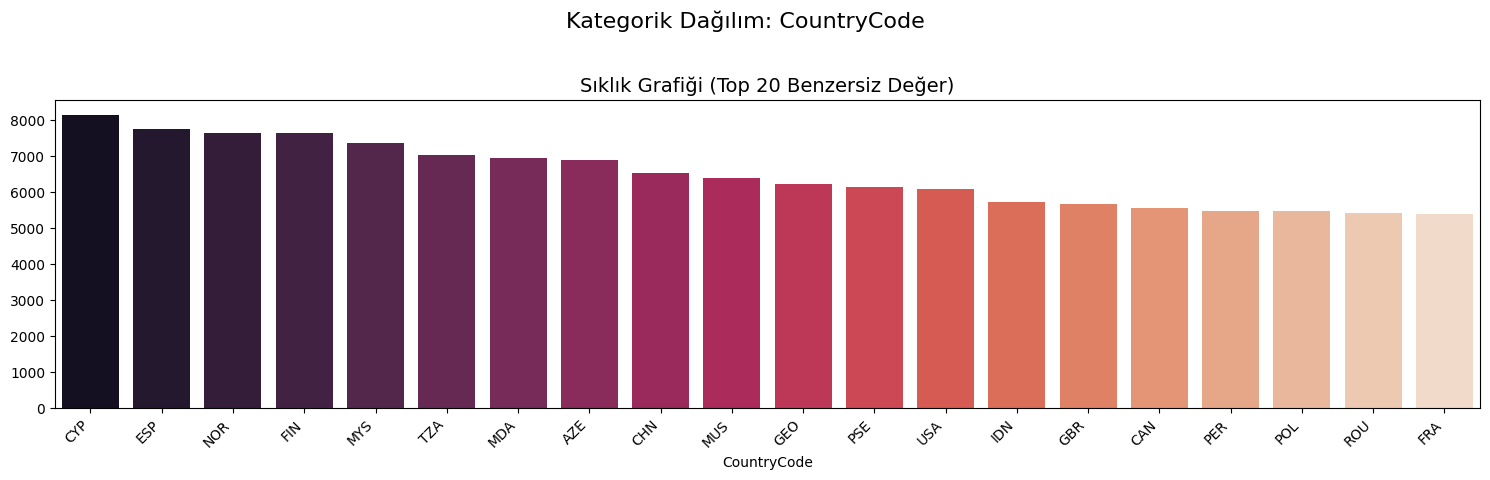

💡 Etik Not: 'CountryCode' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-1880242287.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


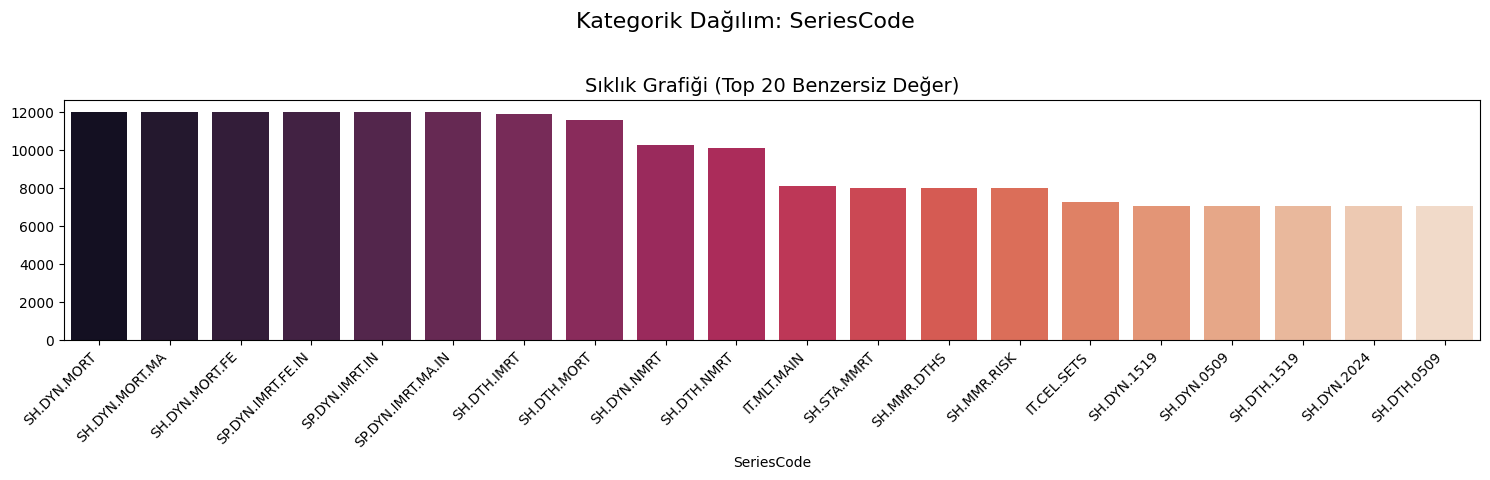

💡 Etik Not: 'SeriesCode' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-1880242287.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


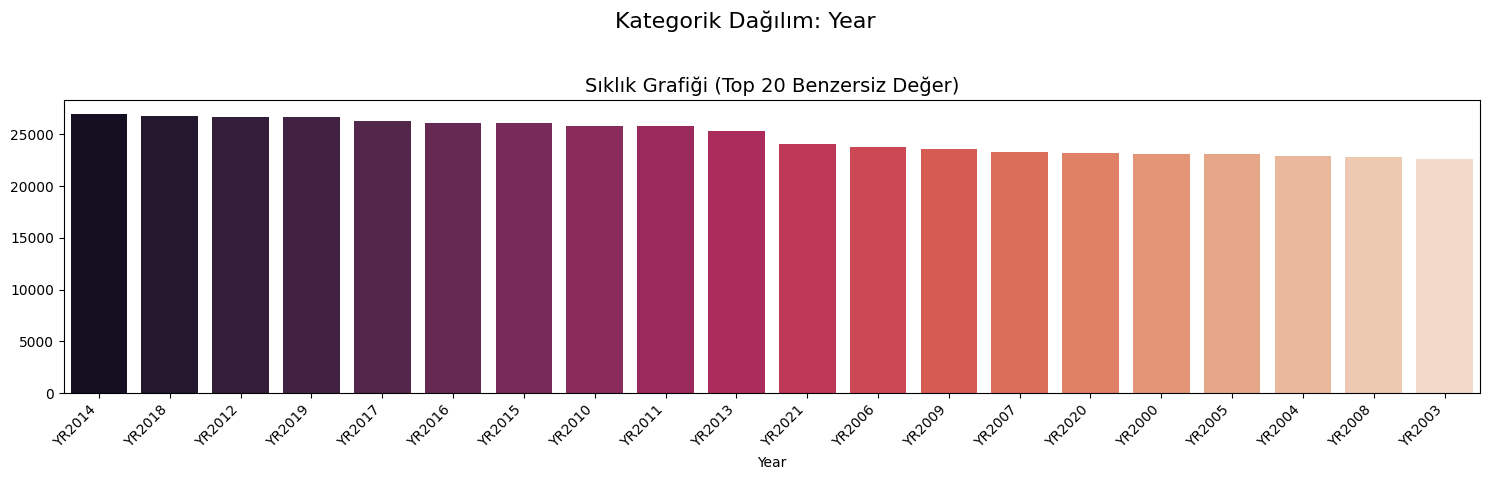

💡 Etik Not: 'Year' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



/tmp/ipython-input-1880242287.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")
/tmp/ipython-input-1880242287.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


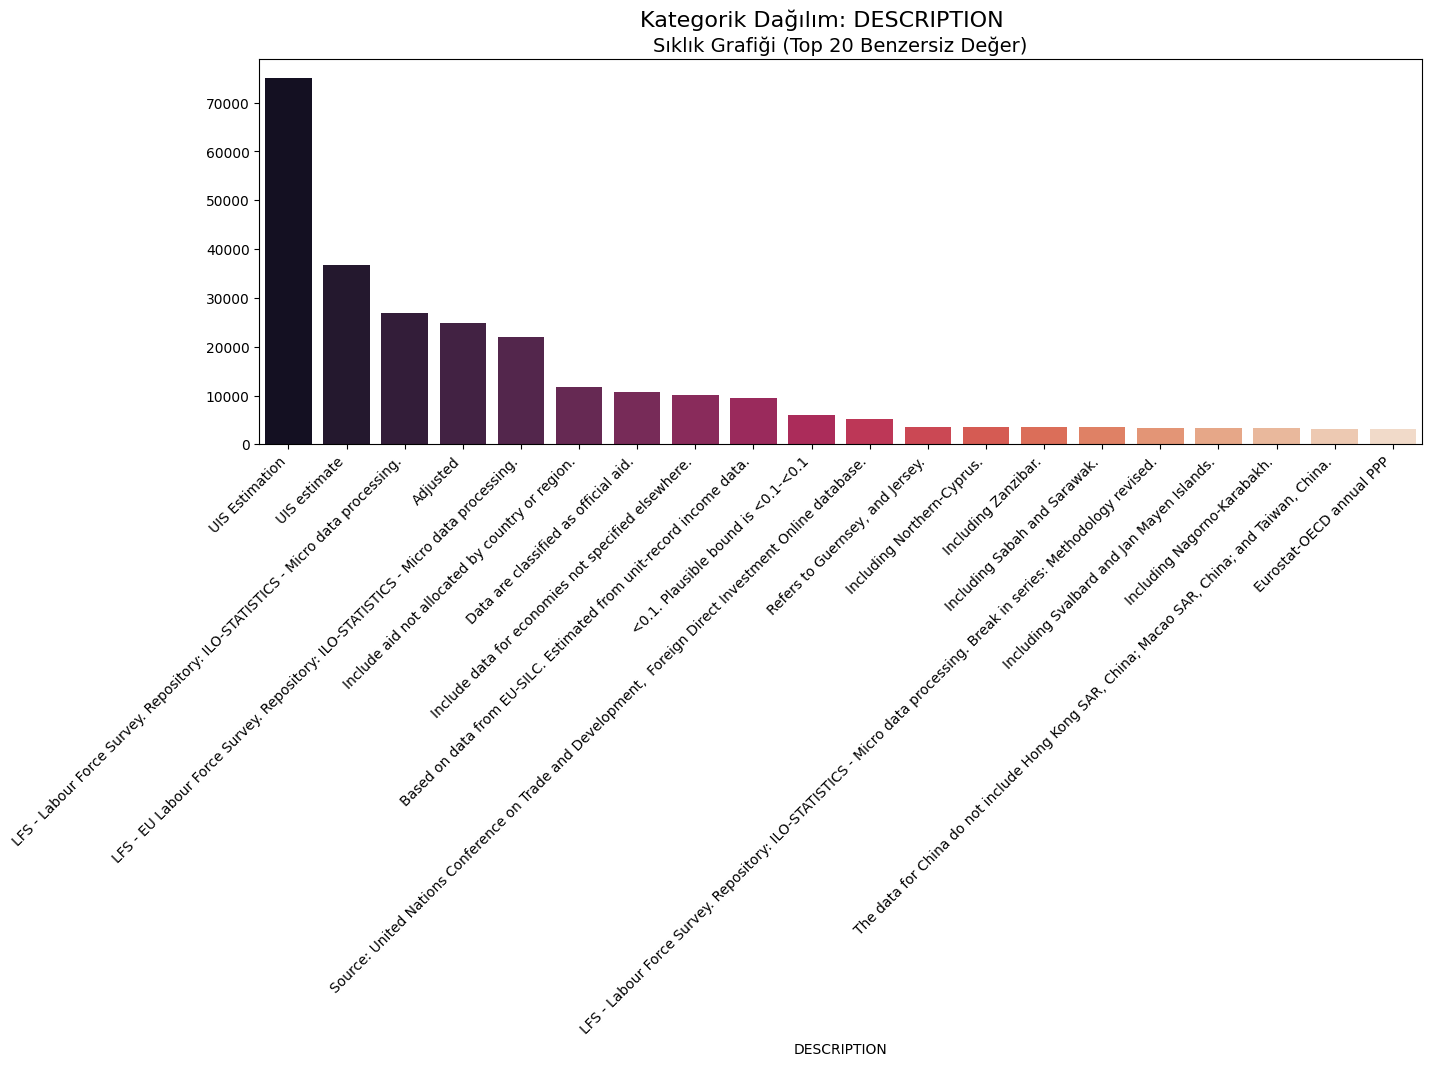

💡 Etik Not: 'DESCRIPTION' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.



In [5]:
# =========================================================
# 4. Tek Değişkenli Dağılım Modülü (Kategorik Odaklı)
# =========================================================

import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distributions(df, top_n=20):
    """
    Veri setindeki tüm kategorik sütunların dağılımını görselleştirir.
    Sadece kategorik (object) sütunları analiz eder.

    Parametreler:
    - df: Veri seti (DataFrame)
    - top_n: Grafikte gösterilecek en sık tekrar eden değer sayısı
    """
    if df is None:
        print("❌ HATA: Veri seti boş.")
        return

    # Kategorik sütunları otomatik algıla (object tipindeki sütunlar)
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    if not categorical_columns:
        print("⚠️ Uyarı: Veri setinde kategorik sütun bulunamadı.")
        return

    for column in categorical_columns:
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Kategorik Dağılım: {column}", fontsize=16)

        # En çok tekrar eden top_n değeri al
        value_counts = df[column].value_counts().nlargest(top_n)

        if len(value_counts) < len(df[column].unique()):
            plot_title = f'Sıklık Grafiği (Top {len(value_counts)} Benzersiz Değer)'
        else:
            plot_title = 'Sıklık Grafiği'

        sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")
        plt.title(plot_title, fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # Etik kontrol uyarısı
        print(f"💡 Etik Not: '{column}' değişkenindeki dağılımı inceleyerek, farklı gruplar veya bölgeler arasındaki olası eşitsizlikleri göz önünde bulundurun.\n")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    print("\n--- Kategorik Dağılım Analizi (Otomatik) ---")
    plot_categorical_distributions(wdicountry_df)



--- Çapraz Tablo Analizi: CountryCode vs SeriesCode ---


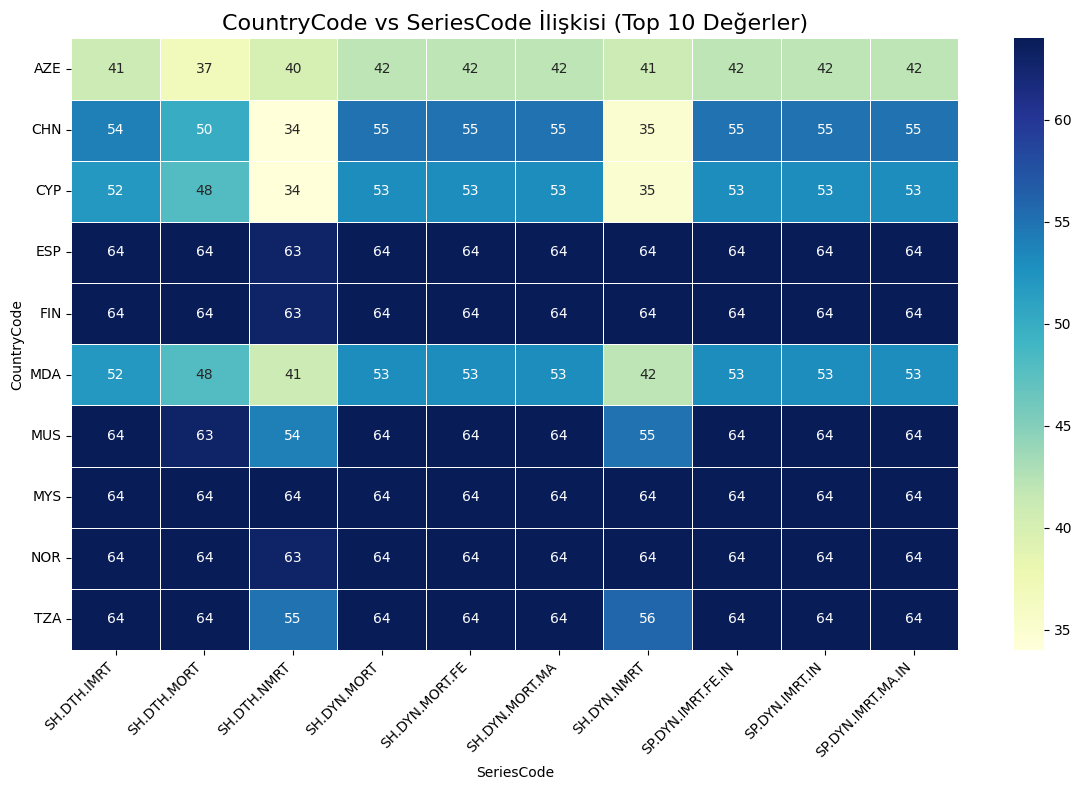

💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).


In [6]:
# =========================================================
# 5. Kategorik İlişkiler Analizi Modülü (Crosstab)
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_categorical_relationships(df, row_col, col_col, normalize=False, top_n=10):
    """
    İki kategorik sütun arasındaki ilişkiyi bir çapraz tablo (crosstab) ve ısı haritası ile analiz eder.
    Çok fazla benzersiz değer varsa, sadece en çok tekrar eden 'top_n' değerlerini kullanır.
    """
    if df is None:
        print("❌ HATA: Veri seti boş.")
        return

    # Hata Kontrolü: Sütunların varlığını kontrol etme
    if row_col not in df.columns or col_col not in df.columns:
        print(f"❌ HATA: '{row_col}' veya '{col_col}' sütunları veri setinde bulunamadı.")
        return

    print(f"\n--- Çapraz Tablo Analizi: {row_col} vs {col_col} ---")

    # Çok fazla benzersiz değeri sınırlandırmak için en sık geçenleri bul
    top_rows = df[row_col].value_counts().nlargest(top_n).index
    top_cols = df[col_col].value_counts().nlargest(top_n).index

    # Sadece en sık geçen değerleri içeren alt kümeyi oluştur
    df_filtered = df[df[row_col].isin(top_rows) & df[col_col].isin(top_cols)]

    # Çapraz tabloyu oluştur
    cross_tab = pd.crosstab(df_filtered[row_col], df_filtered[col_col], normalize=normalize)

    if cross_tab.empty:
        print("⚠️ Uyarı: Filtrelemeden sonra (Top N değerler) çapraz tablo oluşturulamadı. 'top_n' değerini artırmayı deneyin.")
        return

    # Isı Haritası Görselleştirme
    plt.figure(figsize=(max(12, len(top_cols) * 0.8), max(8, len(top_rows) * 0.5)))
    sns.heatmap(cross_tab, annot=True, fmt=".0f" if not normalize else ".2%", cmap='YlGnBu', linewidths=.5, cbar=True)
    plt.title(f'{row_col} vs {col_col} İlişkisi (Top {top_n} Değerler)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Şeffaflık
    print("💡 Etik Not: Bu çapraz tablonun yapısını, sadece en sık geçen değerlerin bir alt kümesiyle oluşturulduğu gerçeğini paydaşlara açıklayın. Bu filtrelemenin sonuçları nasıl etkilediği konusunda şeffaf olun (ASA B.2).")


# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    # CountryCode ve SeriesCode arasındaki ilişkiyi analiz et
    analyze_categorical_relationships(
        wdicountry_df,
        row_col='CountryCode',
        col_col='SeriesCode',
        top_n=10,      # En çok tekrar eden 10 ülke ve 10 seri kodu
        normalize=False # Sıklık (sayı) göster
    )


In [1]:
# =========================================================
# 6. Sonuçların Etik Raporlanması ve Sınırlamalar (Güncel)
# =========================================================

print("\n--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---")
print("\nBu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular "
      "(veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak "
      "aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:")

print("\n* 🔹 BULGULARIN ÖZETİ (ASA B.2):")
print("  - Veri seti 863158 satır ve 4 sütun içermektedir; sütunlar: CountryCode, SeriesCode, Year, DESCRIPTION.")
print("  - Tüm sütunlar kategorik ve eksiksizdir (NaN yok).")
print("  - CountryCode, SeriesCode ve Year değişkenleri üzerinden yapılan dağılım analizleri, "
      "farklı gruplar ve bölgeler arasındaki olası eşitsizlikleri gözlemleme imkânı sağlar.")
print("  - DESCRIPTION sütunu meta veri niteliğindedir ve verinin kaynağı ve tahmin yöntemi hakkında bilgi verir.")

print("\n* 🔹 ETİK İFŞAAT (ASA C.4):")
print("  - Veri tamamen kategorik olduğundan sayısal özet atlanmıştır.")
print("  - Analizlerde yalnızca mevcut ve sınırlı meta veri kullanılmıştır; eksik veri sorunu bulunmamakla birlikte, "
      "analiz kapsamı veri tipine bağlı olarak sınırlıdır.")
print("  - Çapraz tablolar veya dağılımlar yalnızca en sık geçen değerler alt kümesi üzerinden oluşturulabilir; "
      "bu filtrelemenin sonuçlara etkisi paydaşlara açıklanmalıdır.")
print("  - Veri setinin kaynağı ve sınırlamaları belgelenmelidir (ASA B.1).")

print("\n* 🔹 KAPSAM BEYANI (ASA B.2):")
print("  - Çapraz tablolar veya dağılım analizlerinde, Top N filtresi veya alt küme seçimi nedeniyle tüm veri seti genellenemez.")
print("  - Bu nedenle analiz yalnızca mevcut ve yeterli veri ile sınırlı olup, paydaşlara bu sınırlama açıkça belirtilmelidir.")

print("\n💡 Not: Bu adım manuel yorum ve raporlama gerektirir; otomatik olarak üretilen grafik ve tablolar yalnızca rehber niteliğindedir. "
      "Paydaşlarla paylaşmadan önce etik ve metodolojik değerlendirmeyi tamamlayın.")



--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---

Bu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular (veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:

* 🔹 BULGULARIN ÖZETİ (ASA B.2):
  - Veri seti 863158 satır ve 4 sütun içermektedir; sütunlar: CountryCode, SeriesCode, Year, DESCRIPTION.
  - Tüm sütunlar kategorik ve eksiksizdir (NaN yok).
  - CountryCode, SeriesCode ve Year değişkenleri üzerinden yapılan dağılım analizleri, farklı gruplar ve bölgeler arasındaki olası eşitsizlikleri gözlemleme imkânı sağlar.
  - DESCRIPTION sütunu meta veri niteliğindedir ve verinin kaynağı ve tahmin yöntemi hakkında bilgi verir.

* 🔹 ETİK İFŞAAT (ASA C.4):
  - Veri tamamen kategorik olduğundan sayısal özet atlanmıştır.
  - Analizlerde yalnızca mevcut ve sınırlı meta veri kullanılmıştır; eksik veri sorunu bulunmamakla birlikte, analiz kapsamı veri tipine bağlı olarak 